In [1]:
import sys
import os.path
import numpy as np
import pandas as pd
import wave
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages
from collections import OrderedDict
from scipy import signal
from scipy.optimize import curve_fit 
from functools import wraps
from numba import jit


# ディレクトリの絶対パスを取得
current_dir = os.path.dirname(os.path.abspath("__file__"))
# モジュールのあるパスを追加
sys.path.append( str(current_dir) + '/../../../programs' )
print("Add path : /../../../programs")

get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline

plt.rcParams['font.family'] ='IPAPGothic' #使用するフォント
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.top'] = True #x軸の目盛線の上側を表示
plt.rcParams['ytick.right'] = True #y軸の目盛線の右側を表示
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 #軸の線幅edge linewidth。囲みの太さ
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['figure.dpi'] = 100 #dpiの設定
plt.rcParams['figure.subplot.hspace'] = 0.3 # 図と図の幅
plt.rcParams['figure.subplot.wspace'] = 0.3 # 図と図の幅

fig = plt.figure(figsize=(8, 11))

Add path : /../../../programs


<Figure size 800x1100 with 0 Axes>

In [2]:
try:
    import decorators
    import plot_tool
except ModuleNotFoundError as err:
    print(err)
    sys.path.append( str(current_dir) + '/programs' )
    print(sys.path)
    print("Add path : ./programs")
    import decorators
    import plot_tool

In [3]:
import numpy as np
# import matplotlib.pylab as plt
import padasip as pa

# creation of data
N = 500
x = np.random.normal(0, 1, (N, 4)) # input matrix
v = np.random.normal(0, 0.1, N) # noise
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # target

# identification
# f = pa.filters.AdaptiveFilter(model="NLMS", n=4, mu=0.1, w="random")
# y, e, w = f.run(d, x)



In [4]:
@decorators.stop_watch
def NLMS_run():
    global y
    global e
    global w
    y, e, w = f.run(d, x)
    



In [5]:
# identification
f = pa.filters.AdaptiveFilter(model="NLMS", n=4, mu=0.1, w="random")

In [6]:
NLMS_run()

###############  START  ###############
###############  END  ###############
0.00733[sec] elapsed to execute the function:NLMS_run


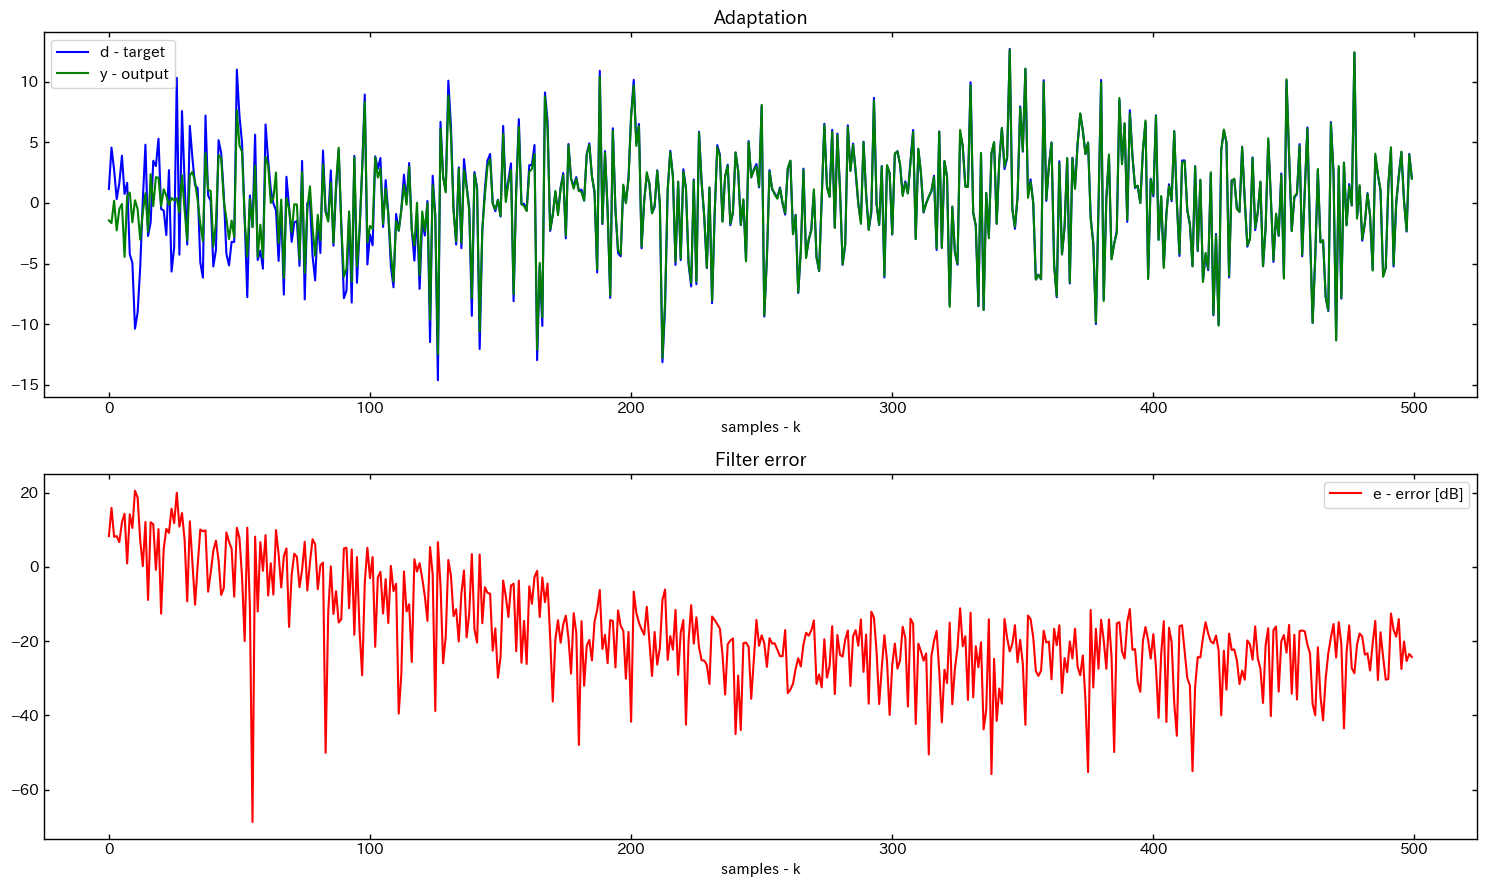

In [7]:
## show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()